In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to add a channel dimension
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Define the model
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2383 - accuracy: 0.9297
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0991 - accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0714 - accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0538 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0420 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0320 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0200 - accuracy: 0.9933
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0938

In [6]:
history.history

{'loss': [0.23830966651439667,
  0.09914057701826096,
  0.07144951820373535,
  0.05382131412625313,
  0.041983988136053085,
  0.031996361911296844,
  0.02947195991873741,
  0.02239855006337166,
  0.020031984895467758,
  0.01975938305258751],
 'accuracy': [0.9296833276748657,
  0.970300018787384,
  0.9773666858673096,
  0.9829999804496765,
  0.986549973487854,
  0.9897333383560181,
  0.9903666377067566,
  0.992733359336853,
  0.9932666420936584,
  0.9934333562850952]}

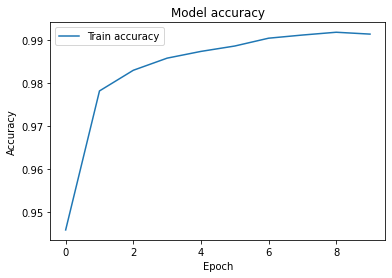

In [15]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy'], loc='upper left')
plt.show()

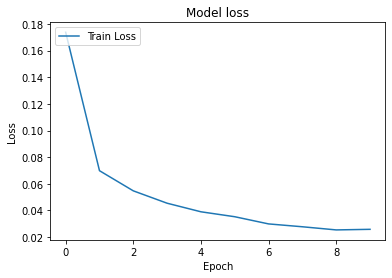

In [16]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss'], loc='upper left')
plt.show()

In [12]:
import seaborn as sns

313/313 [==============================] - 3s 9ms/step


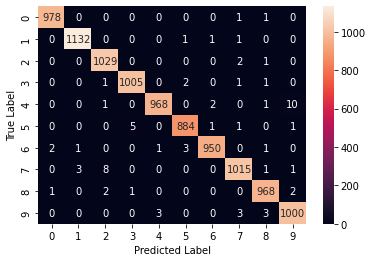

In [17]:
# Make predictions on the test data
y_pred = model.predict(x_test).argmax(axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to add a channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1738 - accuracy: 0.9459
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0698 - accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0547 - accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0454 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0390 - accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0353 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0299 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0254 - accuracy: 0.9918
Epoch 10/10
313/313 [==============================] - 3s 10ms/s

In [ ]:
# Make predictions on the test data
y_pred = model.predict(x_test).argmax(axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

ValueError: ignored

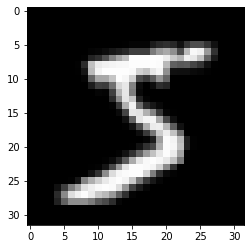

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

x_train = tf.image.resize(x_train,[32,32])
x_test = tf.image.resize(x_test,[32,32])
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

plt.imshow(x_train[0])


In [ ]:
input = tf.keras.Input(shape = [32,32])
# Load the ResNet50 model
model = ResNet50(weights='imagenet', include_top=False)
gap = tf.keras.layers.GlobalAveragePooling2D()(model.output)
output = tf.keras.layers.Dense(10,activation='softmax', use_bias=True)(gap)

model = tf.keras.Model(model.input,output)


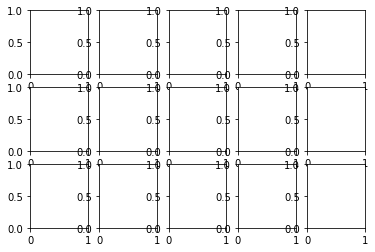

In [ ]:
fig, ax = plt.subplots(3,5)
layer_name = ['conv1_pad','conv2_block1_2_conv']
layer = ['conv1','conv2','conv3','conv4','convout']


layer_output = model.get_layer('conv1_pad').output


## TASK 2


In [55]:
%matplotlib inline

In [ ]:
!unzip /content/image-20210112T150225Z-001.zip
!unzip /content/label-20210112T150240Z-001.zip

In [101]:
imagepath = "/content/image/"
labelpath = "/content/label/"

In [128]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split

In [205]:
randomImage = random.sample(os.listdir(imagepath),k=12)
x_train_file,x_test_file = train_test_split(randomImage)
Y_test_file = [labelpath + x.replace('.jpg','.txt') for x in x_test_file]
Y_train_file = [labelpath + x.replace('.jpg','.txt') for x in x_train_file]
x_train_file = [imagepath +x for x in x_train_file]
x_test_file = [imagepath +x for x in x_test_file]
X_files = [imagepath +x for x in randomImage]
Y_files = [labelpath + x.replace('.jpg','.txt') for x in randomImage]

In [207]:

Y = []

for i in Y_files:
  with open(i) as f:
    a =  f.readline()
    Y.append([float(x) for x in a[:-1].split(" ")])



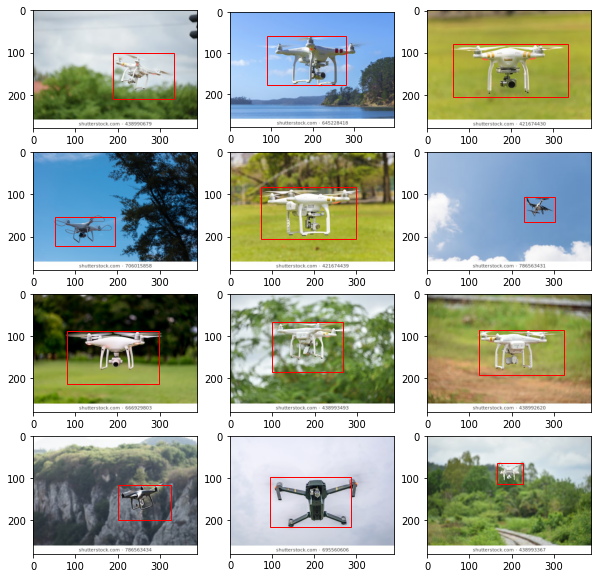

In [208]:
fig, ax = plt.subplots(4,3,figsize=(10,10))
k=0
for i in range(4):
  for j in range(3):
    img = mpimg.imread(X_files[k])
    ax[i,j].imshow(img)
    rec = Rectangle([Y[k][1],Y[k][2]],Y[k][3],Y[k][4],edgecolor = 'r',facecolor='none')
    ax[i,j].add_patch(rec)
    k+=1

In [181]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.13.1+cu116 CPU


## preparing test and train labels

In [283]:
y_train = []
for i in range(len(Y_train_file)):

  with open(Y_train_file[i]) as f:
    temp = [float(x) for x in f.readline()[:-1].split(" ")]
  img = mpimg.imread(x_train_file[i])


  w = img.shape[1]
  h = img.shape[0]
  temp[1] = (temp[1] + temp[3]/2)/w
  temp[2] = (temp[2] + temp[4]/2)/h
  temp[3] = temp[3]/w
  temp[4] = temp[4]/h

  y_train.append(temp)

y_test = []
for i in range(len(Y_test_file)):

  with open(Y_test_file[i]) as f:
    temp = [float(x) for x in f.readline()[:-1].split(" ")]
  img = mpimg.imread(x_test_file[i])
  w = img.shape[1]
  h = img.shape[0]
  temp[1] = (temp[1] + temp[3]/2)/w
  temp[2] = (temp[2] + temp[4]/2)/h
  temp[3] = temp[3]/w
  temp[4] = temp[4]/h

  y_test.append(temp)

In [284]:
k=1
for i in y_train:
  with open("/content/datasets/train/labels/" + str(k) +'.txt', "w+") as f:
    a = [str(x) for x in i]
    f.write(" ".join(a))
  k+=1



In [285]:
k=1
for i in y_test:
  with open("/content/datasets/test/labels/" + str(k) +'.txt', "w+") as f:
    a = [str(x) for x in i]
    f.write(" ".join(a))
  k+=1

In [246]:
import shutil

In [232]:
k=1
for i in x_test_file:
  shutil.copyfile(i, '/content/datasets/test/images/'+str(k)+'.jpg')
  k+=1

In [233]:
k=1
for i in x_train_file:
  shutil.copyfile(i, '/content/datasets/train/images/'+str(k)+'.jpg')
  k+=1

In [286]:
!python train.py --data ../data.yaml --epochs 5

train: weights=yolov5s.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-90-ga895e98 Python-3.8.10 torch-1.13.1+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.

In [288]:
!python detect.py --weights 'runs/train/exp14/weights/best.pt' --source '../image/03012017-dji-phantom-flying-sky-260nw-554568589.jpg' 

detect: weights=['runs/train/exp14/weights/best.pt'], source=../image/03012017-dji-phantom-flying-sky-260nw-554568589.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-90-ga895e98 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/image/03012017-dji-phantom-flying-sky-260nw-554568589.jpg: 320x640 (no detections), 191.7ms
Speed: 1.8ms pre-process, 191.7ms inference, 0.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6
